In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [2]:
data = pd.read_csv('/kaggle/input/jan-movie/movie.csv')

In [3]:
# Tokenization
vocab_size = 10000
max_len = 200
embedding_dim = 100

In [4]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [5]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)

In [6]:
#1D CNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid') 
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/15
900/900 - 33s - 37ms/step - accuracy: 0.7649 - loss: 0.4651 - val_accuracy: 0.8484 - val_loss: 0.3463
Epoch 2/15
900/900 - 31s - 34ms/step - accuracy: 0.8852 - loss: 0.2823 - val_accuracy: 0.8541 - val_loss: 0.3449
Epoch 3/15
900/900 - 31s - 34ms/step - accuracy: 0.9295 - loss: 0.1842 - val_accuracy: 0.8603 - val_loss: 0.3566
Epoch 4/15
900/900 - 31s - 34ms/step - accuracy: 0.9597 - loss: 0.1131 - val_accuracy: 0.8528 - val_loss: 0.4384
Epoch 5/15
900/900 - 30s - 34ms/step - accuracy: 0.9749 - loss: 0.0715 - val_accuracy: 0.8478 - val_loss: 0.5468
Epoch 6/15
900/900 - 31s - 34ms/step - accuracy: 0.9823 - loss: 0.0524 - val_accuracy: 0.8466 - val_loss: 0.6340
Epoch 7/15
900/900 - 30s - 33ms/step - accuracy: 0.9852 - loss: 0.0430 - val_accuracy: 0.8466 - val_loss: 0.7188
Epoch 8/15
900/900 - 30s - 33ms/step - accuracy: 0.9875 - loss: 0.0374 - val_accuracy: 0.8384 - val_loss: 0.7926
Epoch 9/15
900/900 - 30s - 33ms/step - accuracy: 0.9881 - loss: 0.0341 - val_accuracy: 0.8428 - 

In [10]:
# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


Test Accuracy: 0.8454, Test Loss: 1.0295


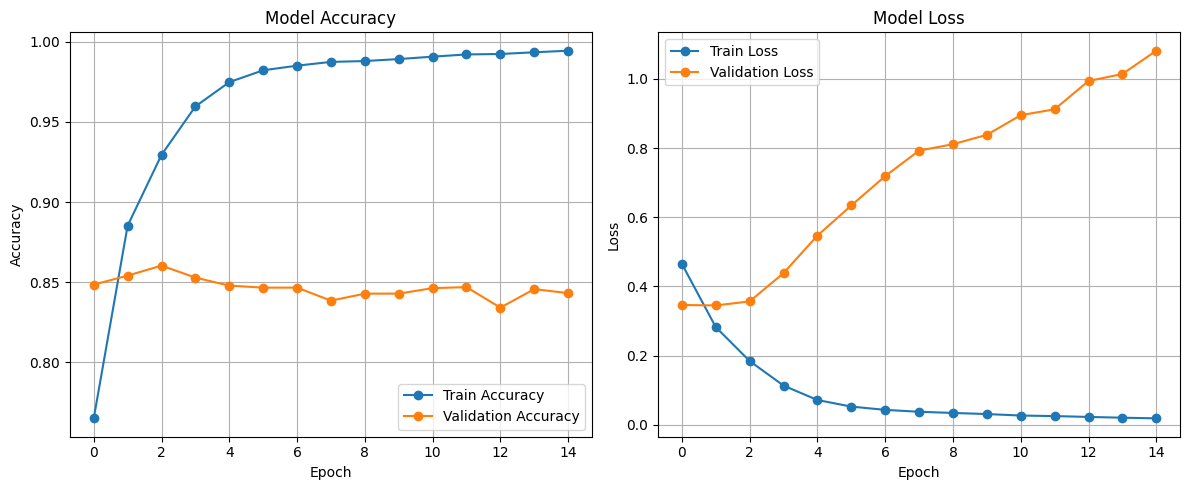

In [11]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
